In [16]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

import glob
import random
import datetime
import tensorflow as tf
from shutil import rmtree
from keras.models import load_model
from os.path import join, getctime, basename
from models import *
from utils import *
from data_preprocess import load_prep_data

%load_ext autoreload
%autoreload 2

aug_data = load_prep_data(time=500, debug=True, onehot=True)
x_train = aug_data['x_train']
y_train = aug_data['y_train']
x_valid = aug_data['x_valid']
y_valid = aug_data['y_valid']
x_test = aug_data['x_test']
y_test = aug_data['y_test']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape of x_train set: (7191, 22, 250)
Shape of y_train labels: (7191, 4)
Shape of x_valid set: (1269, 22, 250)
Shape of y_valid labels: (1269, 4)
Shape of x_test set: (1772, 22, 250)
Shape of y_test labels: (1772, 4)
Shape of x_train_valid set: (8460, 22, 250)
Shape of y_train_valid labels: (8460, 4)


In [17]:
input_shape = x_train.shape
x_train = tf.transpose( tf.expand_dims(x_train, axis=-1), perm=[0, 2, 3, 1])
x_valid = tf.transpose( tf.expand_dims(x_valid, axis=-1), perm=[0, 2, 3, 1])

print("x_train.shape: {}", format(x_train.shape))

x_train.shape: {} (7191, 250, 1, 22)


In [18]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (input_shape[2],1, input_shape[1]),
    'epochs': 20,
    'dropout': 0.5,
    'batch_size': 64
}
threeLayerCNN = threeLayerCNN()
threeLayerCNN.build_model(config)
history = threeLayerCNN.train(x_train, y_train, x_valid, y_valid, config, get_workpath('threeLayerCNN'))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 248, 1, 25)     │         1,675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 248, 1, 25)     │           992 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 83, 1, 25)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 83, 1, 25)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 77, 1, 32)      │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 77, 1, 32)      │           308 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 77, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 77, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 73, 1, 64)      │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 73, 1, 64)      │           292 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 73, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 73, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4672)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        74,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,103 (367.59 KB)

 Trainable params: 93,275 (364.36 KB)

 Non-trainable params: 828 (3.23 KB)

Model compiled.
Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.2849 - loss: 2.9405 - val_accuracy: 0.4224 - val_loss: 2.2481
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 199ms/step - accuracy: 0.3797 - loss: 2.2993 - val_accuracy: 0.4712 - val_loss: 1.8931
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 239ms/step - accuracy: 0.4303 - loss: 1.9821 - val_accuracy: 0.5154 - val_loss: 1.7144
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 251ms/step - accuracy: 0.4831 - loss: 1.7378 - val_accuracy: 0.5563 - val_loss: 1.5621
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step - accuracy: 0.5086 - loss: 1.5807 - val_accuracy: 0.5965 - val_loss: 1.4144
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 25s 222ms/step - accuracy: 0.5587 - loss: 1.4090 - val_accuracy: 0.6178 - val_loss: 1.2855
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 226ms/step - accuracy: 0.5974 - loss: 1.2945 - val_accuracy: 0.6635 - val_loss: 1.1764
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 25s 221ms/step - accuracy: 

In [19]:
x_test = tf.transpose( tf.expand_dims(x_test, axis=-1), perm=[0, 2, 3, 1])
raw = threeLayerCNN.evaluate(x_test, y_test)
print("Raw Acc result: {}".format(raw[1]))
#replace_model_if_better('threeLayerCNN', np.mean(raw[1]), threeLayerCNN, config)

56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6881 - loss: 0.9234
Raw Acc result: 0.7065463066101074


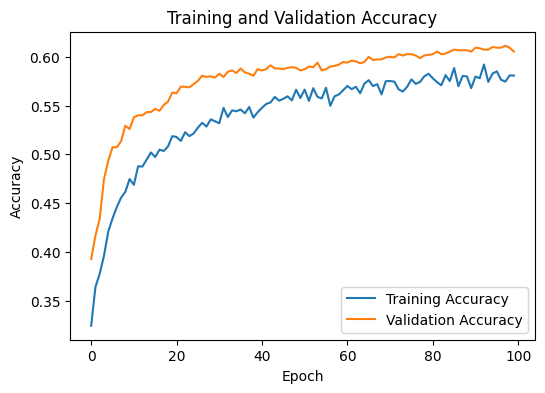

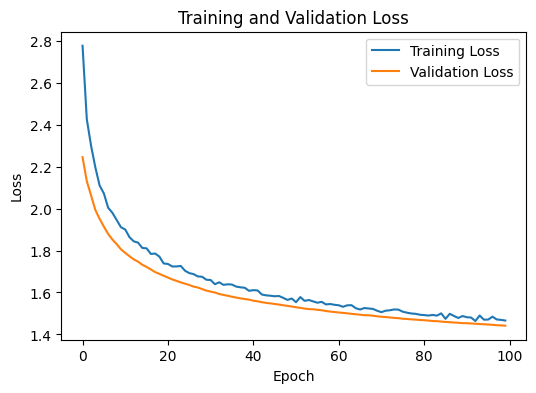

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()